## Modal SNA MAP473D - Ecole Polytechnique

### Imane Farhat - Mohammed El Mendili

# Systemic Risk

The financial crisis of 2008 has shown that failures of financial institutions may led to a systemic crisis which can be defined as a macro-level risk which can impair the stability of the entire financial system. It can occur as a consequence of an aggregate negative chock affecting all institutions in the system. This crisis has shed light on the importance of contagion phenomena. 

In this paper we will try to simulate numerically this rare event, we will try to assess contagion and systemic risk in a network of interlinked institutions.

The financial system is naturally modelled by a counterparties graph G(V,E) where vertices are institutions and edges represent the exposition of one institution to another. 

Furthermore, we will start by a simple model for the capitals of our institutions:  

X($ t_{k+1} $)= $ e^{- \lambda  \delta}$ X($ t_{k} $) + $\mu$ (1- $ e^{- \lambda  \delta}$) + $\sigma \sqrt{\delta}   W_{k}$

Where $W_{k}$ is an iid gaussians and $ t_{k} $ represents time discretion. This is a gaussian process.

Our objective is to study the solvability of our system at a predefined time T. If the capital of an institution i is less than a predefined value ci, then this institution is not solvable. When a bank is no longer solvable, his network is also affected, each institution linked to it will lose a fraction 1-R of his exposition to the unsolvable bank. This will led to the contagion phenomena.

In a first time, we will begin by assuming that our capitals evolve independently (i.e. $W_{k}$ are mutually independents). We will start also by a (very) simple graph to represent our network in order to compute the probabilities over the number of unsolvable institutions using different methods ( Mont-Carlo, Splitting … ). Then we will compute the VaR (Value at Risk) and Conditional VaR of I(T), the loss generated by the contagion phenomena at T. Hence, we will try to find the most probable scenario of contagion and to identify the most dangerous counterparty links and the effects of network size which will allow us to discuss how we can increase the security of our model (its resiliency to contagion).

In a second time, we will try to generalize our simulation by considering the dynamic contagion because the insolvability can occur before the time T. This will led us to change the definition of I(T) to the sum over all the losses before T. 

In a third time, we will try to add a common factor to our capital (which are dependent in real financial networks) which represent to the long-term equilibrium of our network. We will hence see the impact of this modification on our model. 

In a final time, we will try another configurations for our network in order to have some conclusions of the real factors of this rare event.


## Independent capitals

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import networkx as nx


We will start by a simple model for the capitals of our institutions:  

X($ t_{k+1} $)= $ e^{- \lambda  \delta}$ X($ t_{k} $) + $\mu$ (1- $ e^{- \lambda  \delta}$) + $\sigma \sqrt{\delta}   W_{k}$

Where $W_{k}$ is an iid gaussians and $ t_{k} $ represents time discretion. This is a gaussian process.

By induction, we can demonstrate easily that:  X($ t_{k+1} $)=$ \mu $ + $\sum_{i=0}^{k} \sigma \sqrt{\delta}e^{- i\lambda  \delta} W_{k-i}  $ and then for $k=N-1$ we obtain, X($ t_{N} $)=$ \mu $ + Z  where Z $ \sim \mathcal{N}(0,\,\sigma^{2} \delta \frac{1-e^{- 2\lambda  \delta N}}{1-e^{- 2\lambda  \delta }})\ $


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


5.530633101813523
This is random example, Propagation of unsolvability :
I =  [0. 0. 0. ... 0. 0. 0.]


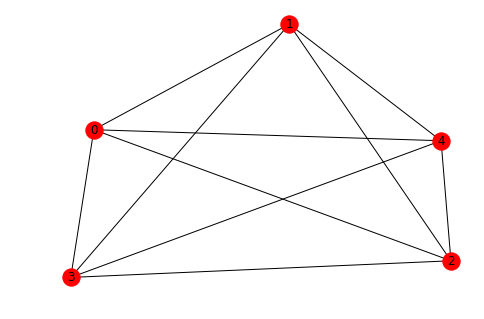

In [2]:

mu=15
c=10
sigma=8
lam=20
R=0.05

T=1 #horizon
delta=1/12
#We consider the monthly incrementing


#First example

E=np.array([[0,3,0,0,6],
           [3,0,0,0,0],
           [3,3,0,0,0],
           [2,2,2,0,2],
           [0,2,3,3,0]])

nbr=np.size(E[0])

# Visualization of our graph
G = nx.from_numpy_matrix(np.array(E)) 
nx.draw(G, with_labels=True)

#Capitals


#The initial capital is mu
m=int(1e5)
N=T/delta
variance=(sigma**2)*delta*(1-np.exp(-2*N*lam*delta))/(1-np.exp(-2*lam*delta))
W=np.random.randn(m,nbr)*np.sqrt(variance)
X=mu+W

print(variance)
#W will define a very useful functionS which maps the initial capitals X to the unsolvability cascade



def Dn(X,c=c,R=R,E=E):
    if len(np.shape(X))==1:
          X=np.array([X])    
    nbr=np.size(E[0])
    m=np.shape(X)[0]
    D=np.zeros([m,nbr,nbr])
    D[:,0,:]=(X<c)
    nv=(X<c)

    for k in range(1,nbr):
        
        X=X-(1-R)*np.transpose(np.dot(E,np.transpose(nv)))*(1-D[:,k-1,:])
        
        nv=(X<c)-D[:,k-1,:]
        D[:,k,:]=X<c
        
    
    return D
    
def IT(X,c=c,R=R,E=E)  :
    """
    This function calculate the loss I(T) of the contagion phenomena 
    """
    if len(np.shape(X))==1:
          X=np.array([X])    
    nbr=np.size(E[0])
    m=np.shape(X)[0]
    D=Dn(X,c,R,E)
    #Y=X+(1-R)*np.transpose(np.dot(np.transpose(E),np.transpose(1-D[:,nbr-1,:])))
    d=D[:,nbr-1,:]
    Y=X+(1-R)*(np.dot(1-d,E))
    
    Y=Y*(d)
    N=np.sum(Y,axis=1)
    return N
I1=IT(X)
D1=Dn(X)

print("This is random example, Propagation of unsolvability :")
print("I = ",I1)




### Naive Monte-Carlo implementation for estimating the probability of having k unsolvable after contagion phenomena

In [3]:
#Estimation de la probabilité que le nombre de banques insolvables soit égal à k entre 1 et nbr
c=10


m=int(1e6) #taille de l'échantillon



#np.random.seed(0)
W=np.random.randn(m,nbr)*np.sqrt(variance)

X=mu+W

D=Dn(X)



In [4]:
# Results

tab=[["Number","P", "Precision", "std"]]

for kk in range(0,nbr+1):
    N_ens=np.sum(D[:,nbr-1,:],axis=1)==kk
    N=np.mean(N_ens)
    s=np.std(N_ens)
    uplus=N+ 1.96*s/np.sqrt(m)
    uminus=N- 1.96*s/np.sqrt(m)
    IC=[uminus,uplus]
    #N=[np.sum(D[i,nbr-1,:])==kk for i in range(m)]
    d= (IC[1]-IC[0])/2
    tab.append([str(kk), str(N), str(d), str(s)])
    
    
    
form="{0:10}{1:10}{2:25}{3:10}"
print("The Monte-carlo naive method gives: ")
for val in tab:
     print( form.format(*val) )
# Default Impact
tI=IT(X)
I=np.mean(tI)
s=np.std(tI)
uplus=I+ 1.96*s/np.sqrt(m)
uminus=I- 1.96*s/np.sqrt(m)
IC=[uminus,uplus]

print("Estimation of I(T) is : {}. The confidence interval of 95% is {} ".format(I,IC))
print(m)

The Monte-carlo naive method gives: 
Number    P         Precision                std       
0         0.919263  0.0005339643537634053    0.27243079273643056
1         0.049908  0.0004267995817766185    0.21775488866154075
2         0.012931  0.00022143480471809897   0.1129769411827033
3         0.007217  0.00016590580798181084   0.08464582039888326
4         0.005264  0.00014182994335416779   0.07236221599702429
5         0.005417  0.00014386528322016257   0.07340065470416458
Estimation of I(T) is : 2.0705516678956477. The confidence interval of 95% is [2.0543548889615173, 2.086748446829778] 
1000000


In [4]:
c=10

m=int(1e6) #taille de l'échantillon

#np.random.seed(0)
W=np.random.randn(m,nbr)*np.sqrt(variance)

X=mu+W

X1=np.sum(X<c, axis=1)
p1=np.mean(X1==0)
print("Probabilities of Insolvency before contagion D0")
print(p1)
print(np.mean(X1==1))
print(np.mean(X1==2))
print(np.mean(X1==3))
print(np.mean(X1==4))
print(np.mean(X1==5))

Probabilities of Insolvency before contagion D0
0.919254
0.078017
0.002678
5e-05
1e-06
0.0


# Adaptative algorithm of optimal mean 

The vector $ W=[W_{1}, W_{2} ,...]$ is gaussian because $W_{k}$ are iid. We define the function f ( named num_ins in the code ) which maps W to N the final number of unsolvable banks.
Thus, for each k=0,1,2,3,4,5 we have: $\mathbb{P}(N=k)= \mathbb{E}(\mathbb{1}_{f(W)=k})$. 
We can now use the adaptative algorithm to compute this probability.

In [5]:
#We will begin by implementing a function that maps the gaussian vector W to the number of unsolvable banks




def num_ins_vec(W,graph=E,threshold=c):
    number=np.size(E[0])
    m=len(W)
    X=mu+W
    
    D=Dn(X,E=E,c=c)
        
    return np.sum(D[:,number-1,:], axis=1)
    
    


In [6]:

kk=2
c=10
d=5
#la méthode prend en entrée un échantillon W iid de loi gaussienne centrée réduite !!

def f_ada(kk,W):
    return num_ins_vec(W*np.sqrt(variance),E,c)==kk
    
    
def M(kk,W,theta):
    #theta est un vcteur de taille d=5
    return f_ada(kk,W+theta)*np.exp(-np.dot(W,theta)-0.5*np.linalg.norm(theta)**2)

    
def V(kk,W,theta):
    return np.mean((f_ada(kk,W)**2)*np.exp(-np.dot(W,theta)+0.5*np.linalg.norm(theta)**2))
    
##calcul de theta optimal

def G(kk,W,theta):
    return np.mean(np.transpose(np.transpose(theta-W)*np.exp(-np.dot(W,theta)+0.5*np.linalg.norm(theta)**2)*(f_ada(kk,W)**2)),axis=0)

def H(kk,W,theta):
    #return np.mean((f_ada(W)**2)*np.dot(np.exp(-np.dot(W,theta)+0.5*np.linalg.norm(theta)**2),(np.ones(d)+np.dot(theta-W,np.transpose(theta-W)))))
    return np.mean([(np.eye(d)+np.dot((theta-W[k]).reshape((d,1)),np.transpose((theta-W[k]).reshape((d,1)))))*(f_ada(kk,W[k])**2)*np.exp(-np.dot(theta,W[k])+0.5*np.linalg.norm(theta)**2) for k in range(n)], axis=0)
    
    
n_max = int(1e4)
iter_max = 100
eps = 0.05

theta=np.array([0,0,0,0,0])
tn = [ theta ]

n=10000
W=np.random.randn(n,d)

while np.linalg.norm(G(kk,W,theta)) > eps and len(tn) < iter_max:
    theta=tn[-1]
    tn.append(theta - np.dot(np.linalg.inv(H(kk,W,theta)),G(kk,W,theta)))
    

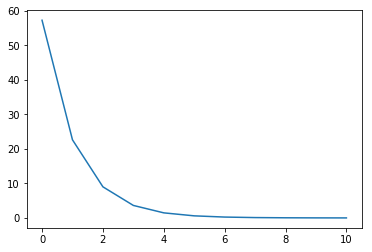

In [7]:
plt.plot([V(kk,W,t) for t in tn])

In [317]:
n=int(1e5)
W=np.random.randn(n,d)
theta=np.array([0,0,0,0,0])

tab1=[["Number","P", "Precision"]]

for kk in range(nbr+1):
    
    tn = [ theta ]
    while np.linalg.norm(G(kk,W,theta)) > eps and len(tn) < iter_max:
        theta=tn[-1]
        tn.append(theta - np.dot(np.linalg.inv(H(kk,W,theta)),G(kk,W,theta)))
    
    Resaults= M(kk,W,theta)
    p= np.mean(Resaults)
    s=np.std(Resaults)
    d= 1.96*s/np.sqrt(n)
    tab1.append([str(kk), str(p), str(d)])

form1="{0:10}      {1:25}  {2:10}"
print("The Adaptative method  gives: ")
for val in tab1:
     print( form1.format(*val) )

The Adaptative method  gives: 
Number          P                          Precision 
0               0.9183780094190099         0.0016749130645841064
1               0.050992689352785316       0.00139241550001012
2               0.012938427107402072       0.0007213751789664015
3               0.007626489028284221       0.000562066524053966
4               0.004958491859085373       0.0004578628347558568
5               0.005326062797285938       0.0004780543464258212


# Splitting with AR(1) Markov chains 

## First approach :

In [45]:
def num_ins_vec1(X,graph=E,threshold=c):
    number=np.size(E[0])
    m=len(X)
    D=Dn(X,E=E,c=c)
        
    return np.sum(D[:,number-1,:], axis=1)## Parameters of our method
N = 5
rho = 0.80
m = int(1e4) # Number of samples
nbr=5

W=np.random.randn(1,nbr)*np.sqrt(variance)
X=mu+W

## Our random Y

Y = np.random.randn(m,nbr)*np.sqrt(variance)
rho_levs=[0.8,0.65,0.76,0.81,0.823] # The optimal parameters

def splitting1(rho_levs=rho_levs,X=X,Y=Y):
    rho_bar_lev = np.sqrt(1-np.array(rho_levs)**2)

    ## Definition of splitting thresholds

    levels=np.array([0,1,2,3,4,5])

    ## Level 0: No Rejection

    P = [ 1 ]
    ## Niveau l
    acc_rate=[]
    k = len(levels)
    for l in range(1,nbr+1):
        a_l_moins_1 = l-1

        ## We store the first value of the last chain
        ## which exceeds the level l-1
        ## In order to initialise the chain in the current level

        startingPoint = X[num_ins_vec1(X) >= a_l_moins_1][0]

        X = np.array([startingPoint])
        Y = np.random.randn(m,nbr)*np.sqrt(variance)
        tot=0
        for i in range(m):
            rho=rho_levs[l-1]
            rho_bar=rho_bar_lev[l-1]
            newX = rho*X[-1] + rho_bar*Y[i,:]+ mu*(1-rho)
            ind=num_ins_vec1(newX) >= a_l_moins_1
            X_1=newX*(ind)
            if ind==1:
                tot+=1
            X_2= X[-1]*(1-ind)
            X = np.append(X, np.array([X_1+X_2]),axis=0)
        tot/=m
        acc_rate.append(tot)
        P.append( np.mean(num_ins_vec1(X)>=l) )

    #Estimation by Splitting method

    P_cum=np.cumprod(P)

    # We transform our results into our goal, P(number_of_contagious_banks = k) for k between 0 and N

    Probas=[]
    for j in range(nbr+1):
        if j==nbr: Probas.append(P_cum[-1])
        else: 
            Probas.append(P_cum[j]-P_cum[j+1])
    return np.array([np.array(Probas),np.array(acc_rate)])

resault=splitting1(rho_levs,X,Y)
Probas=resault[0]
acc=resault[1]
print(acc)
print("The Splitting Method gives these probabilities: ")
for i in range(len(Probas)):

    print("{} unsolvable institution: {}".format(i,Probas[i]))
print(np.sum(Probas))






[1.     0.2966 0.2994 0.3087 0.276 ]
The Splitting Method gives these probabilities: 
0 unsolvable institution: 0.9105089491050895
1 unsolvable institution: 0.05459303084790011
2 unsolvable institution: 0.014882517298320103
3 unsolvable institution: 0.007781249343756409
4 unsolvable institution: 0.007069468095901702
5 unsolvable institution: 0.005164785309032183
1.0


In [48]:
# We will implement a macro-run here

m=int(1e4)
n=100
nbr=5

X_macro=mu+np.random.randn(n,m,nbr)*np.sqrt(variance)
Y_macro=np.random.randn(n,m,nbr)*np.sqrt(variance)
Res=np.array([np.array(splitting1(rho_levs,X_macro[i],Y_macro[i])) for i in range(n)])




In [49]:
print(rho)
tab=[["Number","P", "std"]]
proba=np.mean(Res[:,0], axis=0)
accs=np.mean(Res[:,1], axis=0)
stds=np.std(Res[:,0],axis=0)
tab+=[[str(k), str(proba[k]),str(stds[k])] for k in range(0,nbr+1)]  
    
form="{0:10}{1:25}{2:10}"
print("The First splitting method gives: ")
print("The acceptance rates are {}".format(accs))
for val in tab:
     print( form.format(*val) )


0.8
The First splitting method gives: 
The acceptance rates are [1.       0.299599 0.297189 0.296812 0.278335]
Number    P                        std       
0         0.9190480951904807       0.004694783443490644
1         0.04995061307787828      0.0032654144986900883
2         0.012999914325361961     0.0011742269904020893
3         0.007445957782344255     0.0007217371632482733
4         0.005180204280019406     0.0006466796478721561
5         0.005375215343915135     0.0008118987109091529


### Best Parameters :

In [51]:
n_rho=4
rhos=np.linspace(0.4,0.9,n_rho)
m=int(1e4)
n=100
nbr=5
X_macro_sp1=mu+np.random.randn(n,m,nbr)*np.sqrt(variance)
Y_macro_sp1=np.random.randn(n,m,nbr)*np.sqrt(variance)
Res_sp1=np.array([np.array([splitting1(rho,X_macro_sp1[i],Y_macro_sp1[i]) for i in range(n)]) for rho in rhos])


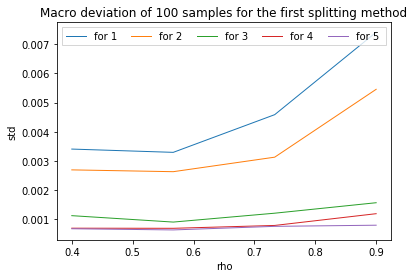

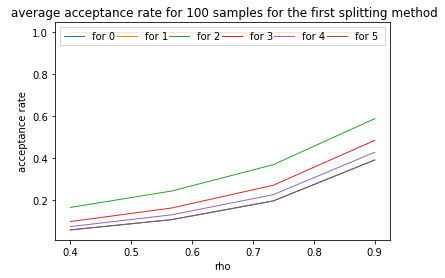

In [52]:
stds_sp1=np.array([np.std(Res_sp1[k,:,0], axis=0) for k in range(n_rho)])
accs=np.array([np.mean(Res_sp1[k,:,1], axis=0) for k in range(n_rho)])
for k in range(1,nbr+1):
    plt.plot(rhos, stds_sp1[:,k-1], linewidth=1.0, label="for {} ".format(k))
plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)
plt.title("Macro deviation of {} samples for the first splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("std")
plt.show()
plt.close()


for k in range(0,nbr+1):
    plt.plot(rhos, accs[:,k-1], linewidth=1.0, label="for {} ".format(k))

plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)
plt.title(" average acceptance rate for {} samples for the first splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("acceptance rate")
plt.show()

# Second approach : 

In [44]:
def num_ins_vec1(X,graph=E,threshold=c):
    number=np.size(E[0])
    m=len(X)
    D=Dn(X,E=E,c=c)
        
    return np.sum(D[:,number-1,:], axis=1)
    
## Parameters of our method
rho = 0.67
m = int(1e4) # Number of samples
nbr=5

## Construction of our samples, we store them in X

W=np.random.randn(m,nbr)*np.sqrt(variance)
X=mu+W

## Our random Y

Y = np.random.randn(m,nbr)*np.sqrt(variance)


def splitting2(rho=rho,X=X,Y=Y):

    rho_bar = np.sqrt(1-rho**2)
    m= np.shape(X)[0]
    X=X[num_ins_vec1(X)>0]
    tot=0
    for i in range(m):
        newX = rho*X[-1] + rho_bar*Y[i,:] + mu*(1-rho)
        ind=num_ins_vec1(newX) >0
        X_1=newX*(ind)
        if ind==1:
            tot+=1
        X_2= X[-1]*(1-ind)
        X = np.append(X, np.array([X_1+X_2]),axis=0)
    acc=tot/m
    p0=(1-sps.norm.pdf(10,loc=mu,scale=np.sqrt(variance)))**5
    P =(1-p0)* np.array([ np.mean(num_ins_vec1(X)==k) for k in range(1,nbr+1) ])
    return [P,acc]
P=splitting2(rho,X,Y)    
print(P)


[array([0.05302109, 0.01448754, 0.00757106, 0.00580448, 0.00453475]), 0.3148]


In [46]:
#Marco-Run f splitting2
m=int(1e4)
n=100
nbr=5
rho=0.65
W=np.random.randn(n,m,nbr)*np.sqrt(variance)
X_macro=mu+W
Y_macro= np.random.randn(n,m,nbr)*np.sqrt(variance)
Res_sp2=np.array([splitting2(rho,X_macro[i],Y_macro[i]) for i in range(n)])

In [47]:
tab2=[["Number","P","std"]]
proba_sp2=np.mean(Res_sp2[:,0], axis=0)
accs_sp2=np.mean(Res_sp2[:,1], axis=0) 
std_sp2=np.std(Res_sp2[:,0])
tab2+=[[str(k+1), str(proba_sp2[k]), str(std_sp2[k])] for k in range(0,nbr)]  
    
form="{0:10}{1:25}{2:10}"
print("The second splitting method gives: ")
print("The acceptance rate is {}".format(accs_sp2))
for val in tab2:
     print( form.format(*val) )

The second splitting method gives: 
The acceptance rate is 0.30063300000000004
Number    P                        std       
1         0.05246316199611137      0.0014175295504226888
2         0.01379917548584272      0.0009372940587347093
3         0.007843870813016098     0.0007164291677429492
4         0.005588039947511595     0.0004840722721066797
5         0.005724674186085514     0.0006381624691643512


In [30]:
n_rho=10
rhos=np.linspace(0.4,0.9,n_rho)
m=int(1e4)
n=100
nbr=5
X_macro_sp2=mu+np.random.randn(n,m,nbr)*np.sqrt(variance)
Y_macro_sp2=np.random.randn(n,m,nbr)*np.sqrt(variance)
Res_sp2=np.array([np.array([splitting2(rho,X_macro_sp2[i],Y_macro_sp2[i]) for i in range(n)]) for rho in rhos])


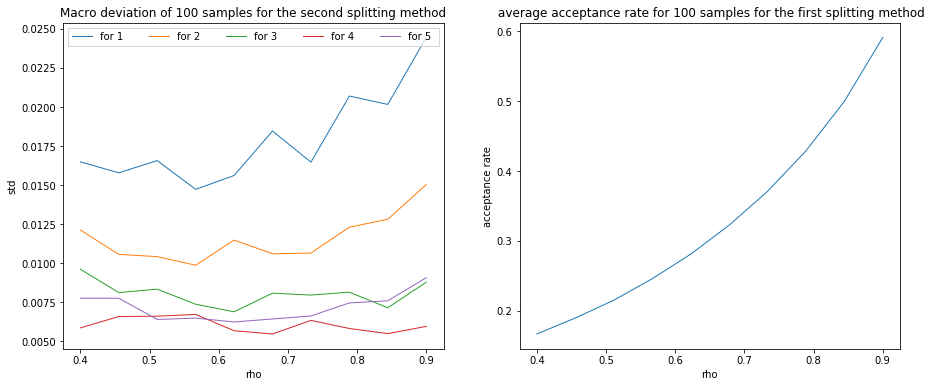

In [31]:
stds_sp2=np.array([np.std(Res_sp2[k,:,0], axis=0) for k in range(n_rho)])
accs_sp2=np.array([np.mean(Res_sp2[k,:,1], axis=0) for k in range(n_rho)])
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
for k in range(1,nbr+1):
    plt.plot(rhos, stds_sp2[:,k-1], linewidth=1.0, label="for {} ".format(k))
plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)
plt.title("Macro deviation of {} samples for the second splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("std")

plt.subplot(1,2,2)
plt.plot(rhos, accs_sp2, linewidth=1.0)

plt.title(" average acceptance rate for {} samples for the first splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("acceptance rate")
plt.show()

# Distribution of I(T)

Let's plot the distribution of I(T) by a histogram

The number of samples used is 107889


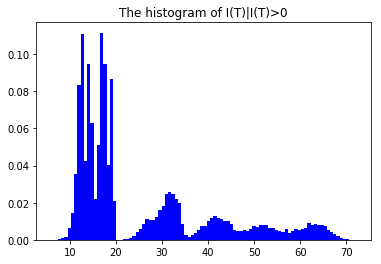

In [51]:
m=int(1e5) 

def GEN_I(m,rho=0.65,nbr=nbr,variance=variance):
    Y = np.random.randn(m,nbr)*np.sqrt(variance)
    W=np.random.randn(m,nbr)*np.sqrt(variance)
    X=mu+W
    rho_bar = np.sqrt(1-rho**2)
    m= np.shape(X)[0]
    X=X[num_ins_vec1(X)>0]
    for i in range(m):
        newX = rho*X[-1] + rho_bar*Y[i,:] + mu*(1-rho)
        ind=num_ins_vec1(newX) >0
        X_1=newX*(ind)
        X_2= X[-1]*(1-ind)
        X = np.append(X, np.array([X_1+X_2]),axis=0)
    return X
    
tII=IT(GEN_I(m))

number_of_nonzero=np.size(tII)
print("The number of samples used is {}".format(number_of_nonzero))
n_colonne = 2 * int(number_of_nonzero** (1. / 3.))
plt.hist(tII, bins=n_colonne, density=True,color="blue",  label="Histogramme")
plt.title("The histogram of I(T)|I(T)>0")
plt.show()


### Estimation of VaR and conditional VaR of I(T)

In this section, we will try to estimate the Value-At-Risk of I(T), the losses generated by the contagion phenomena at time T. This is a quantity which quantifies the systemic risk and contagion effect. 
$I(T)= \sum_{j\in D_{n-1}^{T}}\Bigg( X_{j}(T) + \sum_{p \notin {D_{n-1}^{T}}} (1-R)e_{p,j} \Bigg)$.Since we do not know explicitly the law of this quantity, we will try an empirical approximation using the Glivenko-Cantelli theorem. 
We will simulate a large number of capitals (  X($ t_{N} $)=$ \mu $ + Z  where Z $ \sim \mathcal{N}(0,\,\sigma^{2} \delta \frac{1-e^{- 2\lambda  \delta N}}{1-e^{- 2\lambda  \delta }})\ $ and then compute des corresponding I(T). )

Hence, we will begin by ploting the empirical repartition function of I(T)


 The number of samples used for the empirical repartition function of I(T) is 100000
 The number of samples used for the empirical repartition function of I(T)|I>0 is 107889


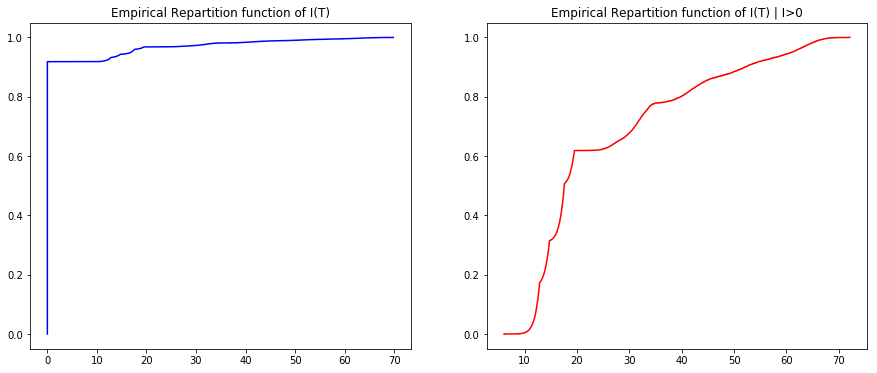

In [78]:
def F_n(x,I):
    return np.mean(I<x)


m=int(1e5)
W=np.random.randn(m,nbr)*np.sqrt(variance)

X=mu+W

D=Dn(X)
        
# The case of VaR

#Default Impact for our samples

I=IT(X)
print(" The number of samples used for the empirical repartition function of I(T) is {}".format(np.size(I)))

I_cond=tII # This is the conditional I(T) | I>0
print(" The number of samples used for the empirical repartition function of I(T)|I>0 is {}".format(np.size(I_cond)))

plt.figure(1)
#x = np.linspace(min(I),max(I),100)

#Empirical repartition function
I.sort()
F_x_n = np.arange(1, m+1) / m
plt.figure(figsize=(15, 6))
plt.subplot(1,2, 1)
plt.step(I, F_x_n, "b", where="pre")
plt.title("Empirical Repartition function of I(T)")


# Conditional VaR

plt.subplot(1, 2, 2)
m_cond= np.size(I_cond)
I_cond.sort()
F_x_n_cond= np.arange(1,m_cond+1)/m_cond
plt.step(I_cond, F_x_n_cond, "r", where="pre")
plt.title("Empirical Repartition function of I(T) | I>0")

plt.show()



Let's calculate the VaR for several values of $\alpha$. 

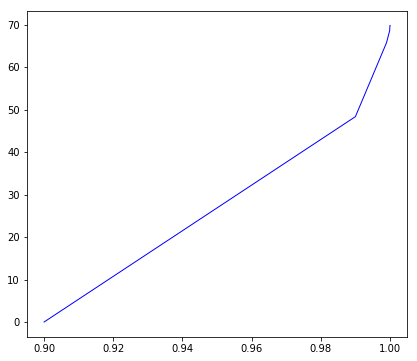

 The estimated VaR is 69.82113002769046


NameError: name 'tII' is not defined

In [76]:
alpha=0.999999
u = alpha

m=int(1e5)

W=np.random.randn(m,nbr)*np.sqrt(variance)

X=mu+W

D=Dn(X)
        


#Default Impact for our samples

I=IT(X)

#Evolution of our empirical quantile (For the first repetition)
x=np.array([0.9,0.99,0.999,0.9999,0.99999,0.999999])
I1=np.sort(I)
Q_empirique_u = [I1[int(m*p)] for p in x] 
#Plotting empirical quantiles
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(x, Q_empirique_u, color="b", linewidth=1.0, label="Empirical Quantile")
plt.show()                                                                                                                           
#Q_empirique_u_1 = [np.sort(tII[0:i])[int(i*u)] for i in range(1,np.size(tII+1))]

print(" The estimated VaR is {}".format(Q_empirique_u[-1]))
print(" The estimated conditional VaR is {}".format(np.sort(tII)[int(np.size(tII)*u)]))


plt.title("Empirical quantile for I(T)")
plt.legend(loc="best")
plt.figure(2)
plt.subplot(1,2,2)
plt.plot(range(1,np.size(tII+1)), Q_empirique_u_1, color="b", linewidth=1.0, label="Empirical Quantile")
plt.title("Empirical quantile for I(T)|I>0")
plt.legend(loc="best")

plt.show()                                                              

106.09560781289724


We can demonstrate that for every $ 0<u<1$, $ \sqrt{n} (F_n(Q(u))- u)  \longrightarrow  \mathcal{N}(0,u(1-u))$ for huge n. Thus, we can easily compute a confidence interval for our estimation of VaR. In fact, we have:
$$\mathbb{P}\bigg(u-1.96 \frac{\sqrt{u(1-u)}}{\sqrt{n}} \leq F_n(Q(u)) < u+1.96 \frac{\sqrt{u(1-u)}}{\sqrt{n}}\bigg) \longrightarrow 0.95.$$
Let's define $u^\pm_n= u  \pm 1.96 \frac{\sqrt{u(1-u)}}{\sqrt{n}}$ with $u=1-\alpha$,we have $[Q_n(u_n^-),Q_n(u_n^+)]$ is the confidence interval with treshold   $95\%$ of $\mathbb(VaR)(\alpha)$

In [79]:
alpha = 1.e-2

alphas=[1.e-2, 1.e-3, 1.e-4, 1.e-5, 1.e-6]

# Generating our samples

m=int(1e7)
W=np.random.randn(m,nbr)*np.sqrt(variance)
X=mu+W
#D=Dn(X)
#Default Impact for our samples
#I=IT(X)
#J=np.sort(I)
#J1=np.sort(tII)
for alpha in alphas:
        u = 1-alpha
        n=m
        #n1=np.size(tII)
        #Empirical quantiles
        unmoins = u - 1.96 * np.sqrt(u*(1-u)/n)
        unplus = u + 1.96 * np.sqrt(u*(1-u)/n)
        #unmoins_cond = u - 1.96 * np.sqrt(u*(1-u)/n1)
        #unplus_cond = u + 1.96 * np.sqrt(u*(1-u)/n1)
        if n*unplus>=n: unplus=(n-1)/n
        Q_n_u = J[int(n*u)]
        
        #if n1*unplus_cond>=n1: unplus_cond=(n1-1)/n1
        #Q_n_u_cond = J1[int(n1*u)]

        IC = np.array([J[int(n*unmoins)],J[int(n*unplus)]])
        #IC_cond = np.array([J1[int(n1*unmoins_cond)],J1[int(n1*unplus_cond)]])

        rayonIC = (IC[1] - IC[0])/2
        #rayonIC_cond=(IC_cond[1] - IC_cond[0])/2

        print("Estimated Value for VaR({}) : {:1.2f}, and the confidence interval IC= [{:1.2f},{:1.2f}] \n".format(1-alpha,Q_n_u, IC[0], IC[1]))
        #print("Estimated Value for conditional VaR({}) : {:1.2f}, and the confidence interval IC= [{:1.2f},{:1.2f}] \n".format(1-alpha, Q_n_u_cond, IC_cond[0], IC_cond[1]))

Estimated Value for VaR(0.99) : 48.71, and the confidence interval IC= [48.57,48.85] 

Estimated Value for VaR(0.999) : 65.65, and the confidence interval IC= [65.61,65.69] 

Estimated Value for VaR(0.9999) : 68.64, and the confidence interval IC= [68.58,68.68] 

Estimated Value for VaR(0.99999) : 70.29, and the confidence interval IC= [70.18,70.42] 

Estimated Value for VaR(0.999999) : 71.72, and the confidence interval IC= [71.48,71.96] 



# Splitting method to estimate VaR

In [4]:
def num_ins_vec1(X,graph=E,threshold=c):
    number=np.size(E[0])
    m=len(X)
    D=Dn(X,E=E,c=c)
        
    return np.sum(D[:,number-1,:], axis=1)## Parameters of our method
N = 5
rho = 0.93
m = int(1e5) # Number of samples
nbr=5



## Our random Y

rho=np.array([0.73,0.918,0.962,0.985])
## Construction of our samples, we store them in X
def splitting3(rho=rho,seuil=0.1,m=m,nbr=nbr):
    rho_bar = np.sqrt(1-rho**2)

    ## Definition of splitting thresholds
    quantiles=np.array([])
    W=np.random.randn(m,nbr)*np.sqrt(variance)
    X=mu+W

    ## Our random Y

    I=IT(X)
    I1=np.sort(I)
    ## We define a table which will contain our Q(0.1),Q(0.01),Q(0.001),Q(0.0001),Q(0.00001), Q(0.000001)

    quantiles=np.array([])
    quantiles=np.append(quantiles,I1[int((1-0.01)*m)])

    ## Niveau l
    acc_rate=[]
    for l in range(1,nbr):

        ## We store the first value of the last chain
        ## which exceeds the level l-1
        ## In order to initialise the chain in the current level

        startingPoint = X[IT(X)>=quantiles[-1]][0]

        X = np.array([startingPoint])
        
        Y = np.random.randn(m,nbr)*np.sqrt(variance)
        tot=0
        for i in range(m):
            newX = rho[l-1]*X[-1] + rho_bar[l-1]*Y[i,:]+ mu*(1-rho[l-1])
            ind=IT(newX) > quantiles[-1]
            X_1=newX*(ind)
            if ind==1:
                tot+=1
            X_2= X[-1]*(1-ind)
            X = np.append(X, np.array([X_1+X_2]),axis=0)
        tot/=m
        acc_rate.append(tot)
        quantiles=np.append(quantiles, IT(X)[int((1-seuil)*m)] )
        

    #Estimation by Splitting method


    return np.array([np.array(quantiles),np.array(acc_rate)])

print(splitting3())

[array([49.27913026, 63.32753289, 66.56631473, 67.35623693, 68.07006784])
 array([0.17212, 0.2105 , 0.20483, 0.32987])]


In [ ]:
#Macro-Run of splitting 3. Please adapt parameters to have real-time execution.
m=int(1e4)
res=[splitting3() for i in range(100)]

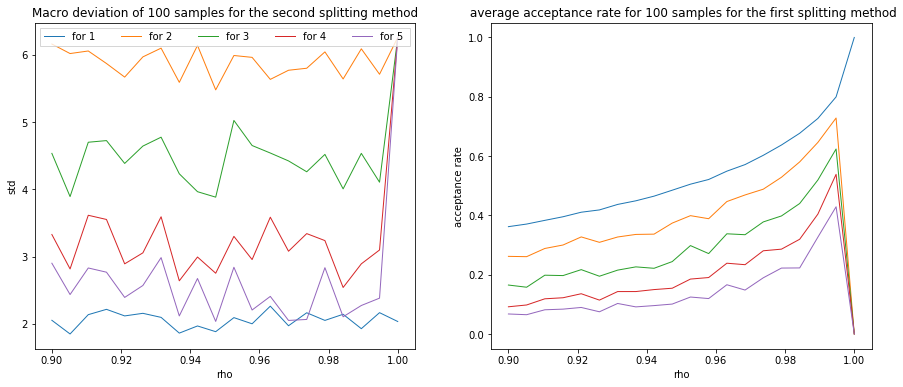

In [81]:
n_rho=20
rhos=np.linspace(0.9,1,n_rho)
m=int(1e5)
n=100
nbr=5
Res_sp3=np.array([np.array([splitting3(rho=rho) for i in range(n)]) for rho in rhos])
stds_sp3=np.array([np.std(Res_sp3[k,:,0], axis=0) for k in range(n_rho)])
accs_sp3=np.array([np.mean(Res_sp3[k,:,1], axis=0) for k in range(n_rho)])
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
for k in range(1,nbr+1):
    plt.plot(rhos, stds_sp3[:,k-1], linewidth=1.0, label="for {} ".format(k))
plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)
plt.title("Macro deviation of {} samples for the second splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("std")

plt.subplot(1,2,2)
plt.plot(rhos, accs_sp3, linewidth=1.0)

plt.title(" average acceptance rate for {} samples for the first splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("acceptance rate")
plt.show()

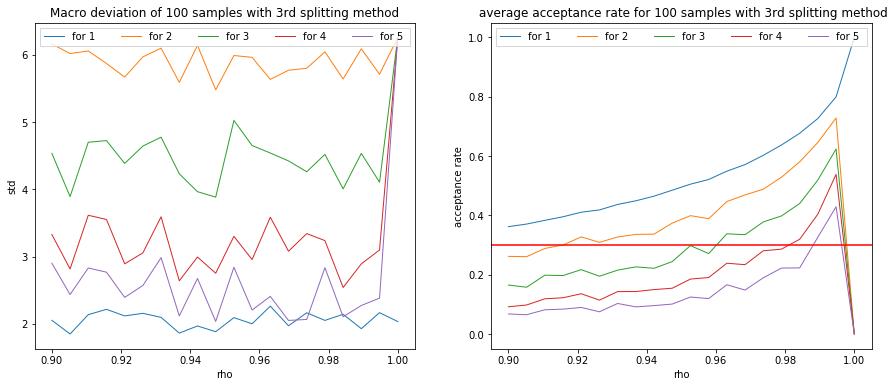

In [84]:
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
for k in range(1,nbr+1):
    plt.plot(rhos, stds_sp3[:,k-1], linewidth=1.0, label="for {} ".format(k))
plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)
plt.title("Macro deviation of {} samples with 3rd splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("std")

plt.subplot(1,2,2)
for k in range(1,nbr+1):
    plt.plot(rhos, accs_sp3[:,k-1], linewidth=1.0, label="for {} ".format(k))
    plt.legend(loc='upper right', ncol=20, mode="expand", shadow=False, fancybox=False)

plt.axhline(y=0.3, color="r", linewidth=1.5)

plt.title(" average acceptance rate for {} samples with 3rd splitting method".format(n))
plt.xlabel("rho")
plt.ylabel("acceptance rate")
plt.show()

# Distribution of I(T) under the condition "Systemic contagion"

540770
The number of samples used is 7196


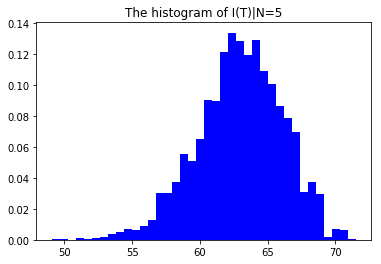

In [57]:
# We generate our samples
m=int(1e5)
W=np.random.randn(m,nbr)*np.sqrt(variance)
X=GEN_I(m)
print(np.size(X))
D=Dn(X) #The table of cascades
# For the conditional law, we choose samples that lead to N=5
Ind=np.sum(D[:,nbr-1,:],axis=1)==5
# We calculate I(T) for these samples 
d=D[:,nbr-1,:][Ind]
Y=X[Ind]+(1-R)*(np.dot(1-d,E))
Y=Y*(d)
Icond=np.sum(Y,axis=1)
#The distribution of I(T) under the condition that all banks failed
number_of_samples=np.size(Icond)
print("The number of samples used is {}".format(number_of_samples))
n_colonne = 2 * int(number_of_samples** (1. / 3.))
plt.hist(Icond, bins=n_colonne, density=True,color="blue",  label="Histogramme")
plt.title("The histogram of I(T)|N=5")
plt.show()

# Maximum of likelihood  Estimation

The histogram we obtained in the last section show that the distribution of I(T) under the condition "Systemic Condition" is almost Gaussian. This will lead us naturally to assume that $I(T)\sim \mathcal{N}(\mu,\sigma^{2})$. Hence, we are aiming to estimate these parameters $\mu$ and $\sigma$. We will use the maximum of likelihood method to estimate them. 
In particular, assume that $(I_{1}(T),...I(T)_{n})$ are an i.i.d random realisations of $I(T)$. 

Let's define :
- Estimator of the mean:  $ \overline {I_{n}(T) }=\frac{1}{n} \sum_{i=1}^{n} I_{n}(T) $ 
- Estimator of the variance:  $\overline{S_{n}^2} = \frac1{n-1}\sum_{i=1}^n (I_{i}(T)-\overline {I_{n}(T) })^2 $

We denote by $ t^{n}_{\alpha}$ the quantile of a Student law with n liberty degrees

We can demontrate  [See Inférence Statistique, MAP433,Ecole Polytechnique] that:
$$
\begin{aligned}
 \mathbb{P}\Bigl(\overline {I_{n}(T) } - S_{n}t^{n-1}_{1-\alpha/2}/\sqrt{n} \le \mu \le \overline {I_{n}(T) } + S_{n}t^{n-1}_{1-\alpha/2}/\sqrt{n} \Bigr)= 1-\alpha 
\end{aligned}
$$
$$
\begin{aligned}
 \mathbb{P}\Bigl((n-1)S_{n}^2 / \chi^2_{n,\alpha/3}(n-1)  \le \sigma^2 \le(n-1)S_{n}^2 / \chi^2_{n,2\alpha/3}(n-1)\Bigr)= 1-\alpha 
\end{aligned}
$$

Hence, we can easily estimate our parameters and campute the confidence interval. In the simulation, we will put $\alpha= 0.05$

In [60]:
# Samples 

m=int(1e6)
W=np.random.randn(m,nbr)*np.sqrt(variance)
X=GEN_I(m)
m=np.size(X)
D=Dn(X) #The table of cascades
# For the conditional law, we choose samples that lead to N=5
Ind=np.sum(D[:,nbr-1,:],axis=1)==5
# We calculate I(T) for these samples 
d=D[:,nbr-1,:][Ind]
Y=X[Ind]+(1-R)*(np.dot(1-d,E))
Y=Y*(d)

# Samples of In(T) conditional to Systemic contagion 

I=np.sum(Y,axis=1)
n=np.size(I)
ISquare = I*I
Sn2 = n*(np.std(I)**2)/(n-1)
Sn=np.sqrt(Sn2)
In=np.mean(I)

# Confidence treshold
alpha=0.05

# Quantiles 
chi2plus = sps.chi2.ppf(q = 0.45, df=n-1)
chi2minus = sps.chi2.ppf(q = 0.55, df=n-1)
tn = sps.t.ppf(1-alpha/2,df=n-1)

# Confidence intervals
Imu=  (In - Sn*tn/np.sqrt(n) , In + Sn*tn/np.sqrt(n))
Isigma = (np.sqrt((n-1)*Sn2/ chi2minus), np.sqrt((n-1)*Sn2/ chi2plus))

# Asymmetry coefficient and kurtosis

Icentered=I-np.mean(I)
#moments
mu2=np.mean(Icentered**2)
mu3=np.mean(Icentered**3)
mu4=np.mean(Icentered**4)

asymmetryCoeff=mu3/(mu2**(3/2))
kurtosis=mu4/(mu2**2)

print("Estimated Value of mu : {} \n".format(In))
print("Non asymptotic confidence interval [{:1.3f},{:1.3f}] \n".format(Imu[0],Imu[1]))
print("Estimated Value of sigma : {} \n".format(Sn))
print("Non asymptotic confidence interval [{:1.3f},{:1.3f}] \n".format(Isigma[0],Isigma[1]))
print("Asymmetry coefficient : ", asymmetryCoeff)
print("Kurtosis : ", kurtosis)
print("The excess of kurtosis is very small !")


Estimated Value of mu : 62.82204668498718 

Non asymptotic confidence interval [62.800,62.845] 

Estimated Value of sigma : 3.1115668868974695 

Non asymptotic confidence interval [3.111,3.113] 

Asymmetry coefficient :  -0.3337285220801781
Kurtosis :  3.053066857437431
On remarque l'excès de kurtosis de la distribution est quasi nul !


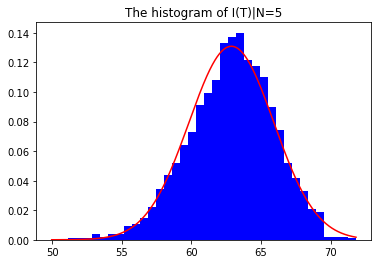

In [59]:


number_of_samples=np.size(I)
n_colonne = 2 * int(number_of_samples** (1. / 3.))
MinI, MaxI = min(I), max(I)
L = MaxI - MinI
sigma = Sn

#Choix du nombre de colonnes dans l'histogramme (voir Exo 4)
N = int(round(n**(5./8.)*L/(3.49*sigma)))

#Densité Gaussienne conditionnelle
x = np.linspace(MinI, MaxI, 1000)
f_x = sps.norm.pdf(x, loc=In, scale=Sn)
plt.plot(x, f_x, "r", linewidth=1.5, label="Densite conditionnelle")
plt.hist(I, bins=n_colonne, density=True,color="blue",  label="Histogramme")
plt.title("The histogram of I(T)|N=5")
plt.show()

In [298]:
print("The size of samples for I|N=5 we took is {}".format(number_of_samples))

The size of samples for I|N=5 we took is 7343


# Random networks:

Previously, we has tried some very simple networks. In reality, networks between intitutions are more complex. Precisely, Interbanks networks in developed countries contain several thousands of nodes (For example, The federal Deposit Insurance Corporation insured 7969 insitutions as of 3/18/2010). Given a description of the large-scale structure of realistic networks, it seems natural to model our network by a random graph, whose statistical properties correspond to these observations. In [1], they has taken the example of the brazilian interbanks network.

We had chosen the Erdős-Rényi random directed graphs, which are largely used to modelize financial and social networks. Concerning exposures, we had taken them uniformly between 0 and 8. 

In the next section, we will try to see the effect of both size and conectivity in the contagion phenomena.

[[0.         1.72228435 0.         0.         0.        ]
 [0.         0.         4.09817378 3.37353602 0.        ]
 [1.27108072 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.38363681 0.         0.        ]]


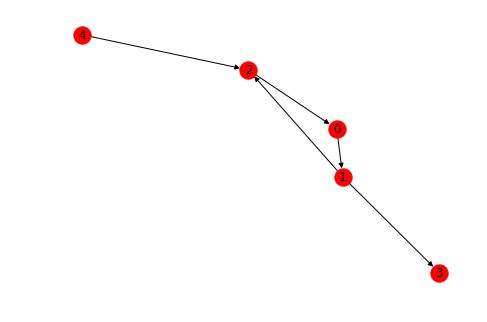

In [4]:
def rand_net(n,prob=0.5, largescale=False, draw=False, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None ):
  if largescale:
      G=nx.scale_free_graph(n, alpha, beta, gamma, delta_in, delta_out, create_using, seed)

  else:
    G=nx.fast_gnp_random_graph(n,prob, seed=None, directed=True)
  if draw:
    nx.draw(G, with_labels=True)
    
  E=np.array(nx.to_numpy_matrix(G))
  W=8*np.random.rand(n,n)
  return np.array(E*W)

E1=rand_net(5,prob=0.85,largescale=True, draw=True,alpha=0.5, beta=0.25, gamma=0.25, delta_in=5.2, delta_out=1)
print(E1)


# Effect of connectivity : Too connected to fail ?

In [3]:
m=int(1e4)
nbr=20
W=np.random.randn(m,nbr)*np.sqrt(variance)
X=mu+W
p = np.linspace(0, 1, 50)

def f(p,n=nbr):
  E= []
  for prob in p:
    E.append([rand_net(n,prob=prob,largescale=False, draw=False) for i in range(int(1000))])
  return np.array(E)

Res=[np.mean([np.mean([IT(X,E=e) for e in ee])]) for ee in f(p) ]

NameError: name 'rand_net' is not defined

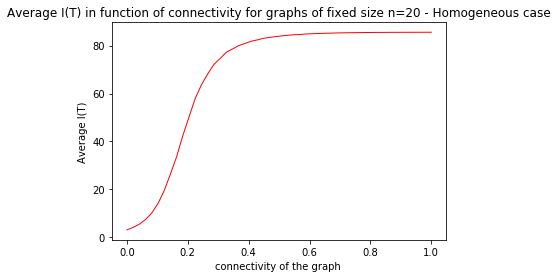

In [54]:
# Plot
plt.plot(p, Res, "r", linewidth=1.0, label="Fct")
plt.title("Average I(T) in function of connectivity for graphs of fixed size n={} - Homogeneous case".format(nbr))
plt.xlabel("connectivity of the graph ")
plt.ylabel("Average I(T)")
plt.show()

# Size effect and contagion 

In [8]:
m=int(1e4)
prob=0.8
sizes = [5, 10, 50, 100, 150, 200]
def g(sizes, prob=prob):
  Res=[]
  contagion_index=[]
  for n in sizes:
    n=int(n)
    res_bis=[]
    c_i=[]
    for i in range(20):
        E=rand_net(n,prob=prob,largescale=False, draw=False)
        W=np.random.randn(m,n)*np.sqrt(variance)
        X=mu+W
        D=Dn(X,E=E)
        N_ens=np.mean(np.sum(D[:,n-1,:],axis=1))/n
        I=np.mean(IT(X,E=E))
        res_bis.append(I)
        c_i.append(N_ens)
    Res.append(np.mean(np.array(res_bis)))
    contagion_index.append(np.mean(np.array(c_i)))
  return np.array([np.array(Res),np.array(contagion_index)])

Res_size=g(sizes)

The connectivity index of the graphs used is 0.8


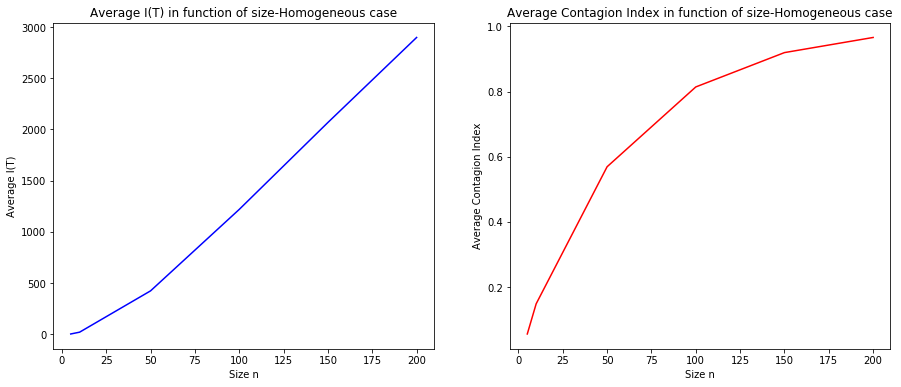

In [9]:
# Plot
print("The connectivity index of the graphs used is {}".format(0.8))
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(sizes, Res_size[0], color= "b",  label="Fct")
plt.title("Average I(T) in function of size-Homogeneous case")
plt.xlabel("Size n")
plt.ylabel("Average I(T)")
plt.subplot(1,2,2)
plt.plot(sizes, Res_size[1], color= "r",  label="Fct")
plt.title("Average Contagion Index in function of size-Homogeneous case")
plt.xlabel("Size n")
plt.ylabel("Average Contagion Index")
plt.show()

## Insolvency cascades

In [21]:
def cascades(X,nbDefaults,c=c,R=R,E=E):
    D=Dn(X,c,R,E)
    indexes=np.where(np.sum(D[:,nbr-1,:],axis=1)==nbDefaults)[0].tolist()
    lis=[]
    for i in indexes:
        d=[]
        for j in range(nbr):
            d.append(np.where(D[i,j]==1)[0].tolist())
        lis.append(d)
        
    if(lis==[]):
        return 0
    l=max(lis, key=lis.count)
    return l,lis.count(l),len(indexes)

In [6]:
for k in range(1,nbr+1):
    print("The most likely insolvency cascade for ",k," defaults is :")
    print(cascades(X,k))

La cascade d'insolvabilité la plus probable pour  1  défauts est :
([[3], [3], [3], [3], [3]], 1345, 5025)
La cascade d'insolvabilité la plus probable pour  2  défauts est :
([[4], [0, 4], [0, 4], [0, 4], [0, 4]], 435, 1257)
La cascade d'insolvabilité la plus probable pour  3  défauts est :
([[4], [0, 4], [0, 3, 4], [0, 3, 4], [0, 3, 4]], 127, 725)
La cascade d'insolvabilité la plus probable pour  4  défauts est :
([[2], [2, 4], [0, 2, 4], [0, 2, 3, 4], [0, 2, 3, 4]], 48, 527)
La cascade d'insolvabilité la plus probable pour  5  défauts est :
([[1], [0, 1], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]], 26, 555)


## Dangerous links in the financial network

In [7]:
def IT(X,c=c,R=R,E=E)  :
    """
    This function calculate the loss I(T) of the contagion phenomena 
    """
    if len(np.shape(X))==1:
        X=np.array([X])    
    nbr=np.size(E[0])
    m=np.shape(X)[0]
    D=Dn(X,c,R,E)
    Y= X+(1-R)*(np.dot(1-D[:,nbr-1,:],E))
    Y=Y*D[:,nbr-1,:]
    N=np.sum(Y,axis=1)

    return N

In [8]:
alpha=0.999999
u = alpha
m=int(1e7)
nbr=5
X=mu+np.random.randn(m,nbr)*np.sqrt(variance)
I=IT(X)
np.sort(I)
print(np.sort(I)[int(m*u)])

71.55799862668684


In [9]:
E2=np.array([[0,3,0,0,0],
           [3,0,0,0,0],
           [3,3,0,0,0],
           [0,2,2,0,2],
           [0,2,3,3,0]])
#We remove the link 5-1
alpha=0.999999
u = alpha
I=IT(X,c,R,E2)
np.sort(I)

print(np.sort(I)[int(m*u)])

30.9366154085922


# Dynamic contagion :

### Probabilities of contagion 

In [4]:
# Let's consider the same parameters
mu=15
c=10
sigma=8
lam=20
R=0.05
T=1 #horizon

#We consider 12 steps

delta=1/12


#Let's redefine our main matrix

E=np.array([[0,3,0,0,6],
           [3,0,0,0,0],
           [3,3,0,0,0],
           [2,2,2,0,2],
           [0,2,3,3,0]])

nbr=np.size(E[0])


#We will generate for each sample a gaussian vector of W for each time step 

m=int(1e6)
N=T/delta
s_dev= sigma*np.sqrt(delta)
W_dyn=s_dev*np.random.randn(m,nbr,int(T/delta))

# The initial value of all institutions is mu

X_dyn=mu*np.ones((m,nbr))

# the number of step is 12

num_step=int(T/delta)

# Let's initialise I of shape=m,12 each column k represents I(tk) for a sample 

I=np.zeros((m,num_step)) 

# Let's define the matrix of propagation of contagion, we add an axis to denote the step 

D_propagation=np.zeros((m,num_step,nbr,nbr))
D_dyn=np.zeros([m,nbr,nbr])

for i in range(num_step):
    # Beginning of each step: update X_dyn 
    
    unsolv= (X_dyn < c)  # This vector is used to update just banks which are solvable in the last step
    X_dyn_uns= X_dyn * unsolv
    new_x= np.exp(-delta*lam)*X_dyn+ mu*(1-np.exp(-lam*delta))+W_dyn[:,:,i] 
    nv_X_dyn=(1-unsolv)* new_x
 
    # Let's update our X_Dyn according to the last unsolvable banks 
    
    X_dyn = X_dyn_uns + nv_X_dyn
    

    # Let's define a matrix D_dyn which determines the propagation of unsolvability in this step 
        
    # We define this variable to denote the new unsolvable banks at each step of time and propagation 
    
    nv=(X_dyn<c)-D_dyn[:,nbr-1,:] 
    
    # Therefore, we begin changing the whole matrix D_dyn
    d_before_step =np.copy(D_dyn[:,nbr-1,:] )
    
    D_dyn[:,0,:]=(X_dyn<c)

    for k in range(1,nbr):
        
        X_dyn=X_dyn-(1-R)*np.transpose(np.dot(E,np.transpose(nv)))*(1-D_dyn[:,k-1,:])
        nv=(X_dyn<c)-D_dyn[:,k-1,:]
        D_dyn[:,k,:]=X_dyn<c
        
    # Let's stock our progress in the general matrix of prapagation
    
    D_propagation[:,i,:,:]=D_dyn

    

    # We define here a matrix Dnv where each column is the new unsolvable banks the contagion generate in this step of the process
    Dnv=D_dyn[:,nbr-1,:]-d_before_step
    d=D_dyn[:,nbr-1,:]
    # The last vector helps us to compute I(tk) in this step 
    
    Y=X_dyn+(1-R)*(np.dot(1-d,E))  
    
    Y=Y*(Dnv)  # This multiplication aims to campute the effect just the effect of the new unsolvable banks generated by the cascade
    N=np.sum(Y,axis=1)
    I[:,i]=N
    
    
    
    
    
    
    
    


In [5]:
# Results
tot=0
tab=[["Number","P", "Precision"]]
nbr=5
for kk in range(0,nbr+1):
    N_ens=np.sum(D_dyn[:,nbr-1,:],axis=1)==kk
    N=np.mean(N_ens)
    tot+=N
    s=np.std(N_ens)
    uplus=N+ 1.96*s/np.sqrt(m)
    uminus=N- 1.96*s/np.sqrt(m)
    IC=[uminus,uplus]
    #N=[np.sum(D[i,nbr-1,:])==kk for i in range(m)]
    d= (IC[1]-IC[0])/2
    tab.append([str(kk), str(N), str(d)])
    
print(tot)    
    
form="{0:10}{1:10}{2:10}"
print("The Monte-carlo naive method gives: ")
for val in tab:
     print( form.format(*val) )
# Default Impact
I1_dyn=np.sum(I,axis=1)
I_mean=np.mean(I1_dyn)
s=np.std(I1_dyn)
uplus=I_mean+ 1.96*s/np.sqrt(m)
uminus=I_mean- 1.96*s/np.sqrt(m)
IC=[uminus,uplus]

print("Estimation of I(T) is : {}. The confidence interval of 95% is {} ".format(I_mean,IC))

1.0
The Monte-carlo naive method gives: 
Number    P         Precision 
0         0.377721  0.0009502419722388633
1         0.255841  0.0008552124460350918
2         0.145466  0.0006910373054687391
3         0.0958    0.0005768608655265101
4         0.067454  0.0004915809644475411
5         0.057718  0.0004570904585744495
Estimation of I(T) is : 17.041447929814968. The confidence interval of 95% is [17.00945987116103, 17.073435988468905] 


In [63]:
print(np.shape(I))

(1000000, 12)


### Variations of I 

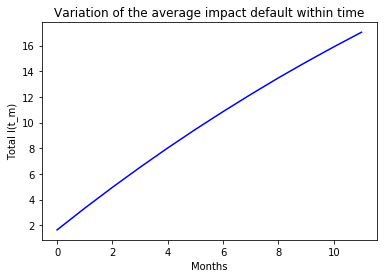

In [6]:
I_mean=np.mean(I,axis=0)
I_mean=np.cumsum(I_mean)
x=np.arange(0,num_step)
plt.plot(x, I_mean,color= "b",  label="Fct")
plt.title("Variation of the average impact default within time")
plt.xlabel("Months")
plt.ylabel("Total I(t_m)")
plt.show()

### Distribution of I(T)|I>0:

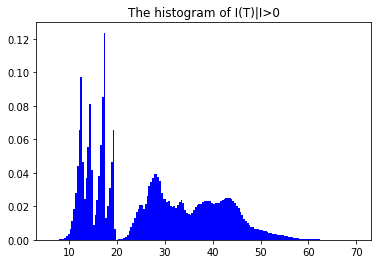

In [7]:
I_sum= np.sum(I,axis=1)
I_sum=I_sum[I_sum>0]
number_of_nonzero=np.size(I_sum)
n_colonne = 2 * int(number_of_nonzero** (1. / 3.))

plt.hist(I_sum, bins=n_colonne, density=True,color="blue",  label="Histogramme")
plt.title("The histogram of I(T)|I>0")
plt.show()


## Disttibution of I(T)|"Systemic contagion"

(1000000,)
[47.41734612 61.10877493 44.44419993 ... 42.82392571 55.26112784
 44.06781156]
The number of samples used is 57718


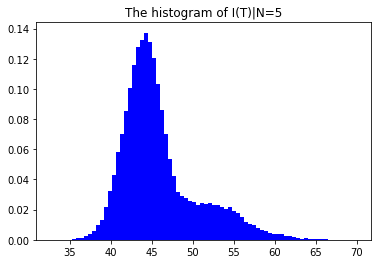

In [19]:
# We generate our samples
m=int(1e6)
# We take just samples that leads to systemic contagion in the final step our our model
Number_ins=np.sum(D_propagation[:,num_step-1,nbr-1,:],axis=1)
Ind=(Number_ins==5)
I_sum= np.sum(I,axis=1)
print(np.shape(Ind))
# We calculate I(T) for these samples 
I_cont=I_sum[Ind]
print(I_cont)

#The distribution of I(T) under the condition that all banks failed
number_of_samples=np.size(I_cont)
print("The number of samples used is {}".format(number_of_samples))
n_colonne = 2 * int(number_of_samples** (1. / 3.))
plt.hist(I_cont, bins=n_colonne, density=True,color="blue",  label="Histogramme")
plt.title("The histogram of I(T)|N=5")
plt.show()

### VaR

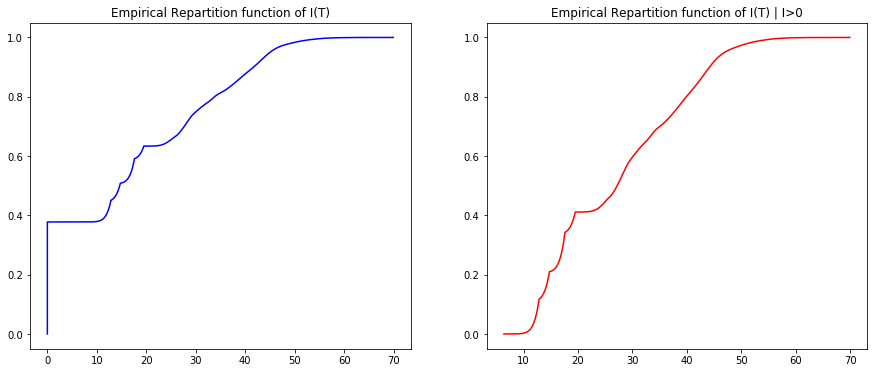

In [8]:
I_sum=np.sum(I,axis=1)

I_cond=I_sum[I_sum>0] # This is the conditional I(T) | I>0

plt.figure(1)
#x = np.linspace(min(I),max(I),100)

#Empirical repartition function
I_sum.sort()
F_x_n = np.arange(1, m+1) / m
plt.figure(figsize=(15, 6))
plt.subplot(1,2, 1)
plt.step(I_sum, F_x_n, "b", where="post")
plt.title("Empirical Repartition function of I(T)")


# Conditional VaR

plt.subplot(1, 2, 2)
m_cond= np.size(I_cond)
I_cond.sort()
F_x_n_cond= np.arange(1,m_cond+1)/m_cond
plt.step(I_cond, F_x_n_cond, "r", where="post")
plt.title("Empirical Repartition function of I(T) | I>0")

plt.show()


In [11]:
alpha=0.999999
alphas=[1.e-2, 1.e-3, 1.e-4, 1.e-5, 1.e-6]
m=int(1e6)
# Generating our samples
J=np.sort(I_sum)
for alpha in alphas:
        u = 1-alpha
        n=m
        unmoins = u - 1.96 * np.sqrt(u*(1-u)/n)
        unplus = u + 1.96 * np.sqrt(u*(1-u)/n)
        if n*unplus>=n: unplus=(n-1)/n
        Q_n_u = J[int(n*u)]
        IC = np.array([J[int(n*unmoins)],J[int(n*unplus)]])
        rayonIC = (IC[1] - IC[0])/2
        print("Estimated Value for VaR({}) : {:1.2f}, and the confidence interval IC= [{:1.2f},{:1.2f}] \n".format(1-alpha,Q_n_u, IC[0], IC[1]))


Estimated Value for VaR(0.99) : 52.03, and the confidence interval IC= [51.96,52.11] 

Estimated Value for VaR(0.999) : 58.64, and the confidence interval IC= [58.51,58.79] 

Estimated Value for VaR(0.9999) : 63.20, and the confidence interval IC= [62.96,63.61] 

Estimated Value for VaR(0.99999) : 66.53, and the confidence interval IC= [65.98,67.56] 

Estimated Value for VaR(0.999999) : 69.93, and the confidence interval IC= [67.80,69.93] 



## Long term balance model

In [9]:
sigma2=3
lambda2=10
variance2=(sigma2**2)*delta*(1-np.exp(-2*lambda2*T))/(1-np.exp(-2*lambda2*delta))

In [10]:
variance2+variance

6.455275488453433

In [24]:
m=int(1e5)
#np.random.seed(0)
W=np.random.randn(m,nbr)*np.sqrt(variance)
Z=np.random.randn(m,1)*np.sqrt(variance2)
X=mu+W+Z

In [12]:
pa=0

D=Dn(X)
for k in range(nbr+1):
    print("pour ",k)
    N=np.sum(D[:,nbr-1,:], axis=1)
    if(k!=0) :
        pa+=np.mean(N==k)
    print(np.mean(N==k))

print("Proba que le nombre soit supérieur ou egal à 1 : ",pa)

pour  0
0.88759
pour  1
0.05259
pour  2
0.01534
pour  3
0.01148
pour  4
0.01312
pour  5
0.01988
Proba que le nombre soit supérieur ou egal à 1 :  0.11241


In [13]:
tab=[["Number","P", "Precision","std"]]

for kk in range(0,nbr+1):
    N_ens=np.sum(D[:,nbr-1,:],axis=1)==kk
    N=np.mean(N_ens)
    s=np.std(N_ens)
    uplus=N+ 1.96*s/np.sqrt(m)
    uminus=N- 1.96*s/np.sqrt(m)
    IC=[uminus,uplus]
    #N=[np.sum(D[i,nbr-1,:])==kk for i in range(m)]
    d= (IC[1]-IC[0])/2
    tab.append([str(kk), str(N), str(d),s])
    
    
form="{0:10}     {1:10}    {2:10}             {3:10}"
print("The Monte-carlo naive method gives: ")
for val in tab:
     print( form.format(*val) )
# Default Impact
tI=IT(X)
I=np.mean(tI)
s=np.std(tI)
uplus=I+ 1.96*s/np.sqrt(m)
uminus=I- 1.96*s/np.sqrt(m)
IC=[uminus,uplus]

print("Estimation of I(T) is : {}. The confidence interval of 95% is {} ".format(I,IC))

The Monte-carlo naive method gives: 
Number         P             Precision              std       
0              0.88759       0.0019577838677521386             0.3158702136954354
1              0.05259       0.0013834919579203894             0.22321355671195242
2              0.01534       0.0007617490110990626             0.12290111634968984
3              0.01148       0.0006602672337725074             0.10652797566836611
4              0.01312       0.0007052695973098506             0.11378868836575978
5              0.01988       0.0008651748514662237             0.13958791351689445
Estimation of I(T) is : 3.56259490727679. The confidence interval of 95% is [3.4899351462343793, 3.6352546683192006] 


### VaR

In [14]:
alpha=0.999999
u = alpha

I=IT(X)
np.sort(I)
print(np.sort(I)[int(m*u)])

69.86429542069


In [25]:
for k in range(1,nbr+1):
    print("The most likely insolvency cascade for ",k," defaults is :")
    print(cascades(X,k))

La cascade d'insolvabilité la plus probable pour  1  défauts est :
([[3], [3], [3], [3], [3]], 1527, 5292)
La cascade d'insolvabilité la plus probable pour  2  défauts est :
([[4], [0, 4], [0, 4], [0, 4], [0, 4]], 463, 1517)
La cascade d'insolvabilité la plus probable pour  3  défauts est :
([[4], [0, 4], [0, 3, 4], [0, 3, 4], [0, 3, 4]], 215, 1137)
La cascade d'insolvabilité la plus probable pour  4  défauts est :
([[2], [2, 4], [0, 2, 4], [0, 2, 3, 4], [0, 2, 3, 4]], 101, 1283)
La cascade d'insolvabilité la plus probable pour  5  défauts est :
([[4], [0, 4], [0, 1, 2, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]], 61, 2011)


## One last real word example

In [26]:
E3=np.array([[0,1095468, 491136,529732,35143,379,4781,35410,5434,1558],
             [520953,0,465682,281450,46050,2324,2790,43516,13441,64],
             [175515,175165,0,260927,257408,2557,4152,77171,5185,55],
             [202470,269083,189401,0,42440,3434,1578,12794,2089,58],
             [35071,66387,162285,392577,0,711,439,1094,584,24],
             [10400,3943,13773,7860,1198,0,1,121991,2,2],
             [19745,24682,18306,23873,4017,0,0,234,30451,5],
             [22778,19033,34244,13119,2745,3405,166,0,24,8],
             [7320,14060,26059,56740,4085,27,107,145,0,0],
             [7846,2948,4542,3318,813,0,0,100,0,0]])

m=int(1e5)
#np.random.seed(0)
v3=300 #variance
codes={1:'US', 2:'GB', 3:'DE', 4:'FR', 5:'IT', 6:'FI',7:'TR',8:'SE',9:'GR',10:'CL'}
mu3=np.array([21410230,3022580, 4416800,3060070, 2261460, 304133, 961655, 628802,235836 ,295844 ])/1000
w=np.random.randn(m,10)*np.sqrt(v3)
X=w+mu3
nbr3=10
c3=mu3*0.7
R3=0.05

In [27]:
D=Dn(X,c3,R3,E3)
for k in range(nbr3+1):
    print("pour ",k)
    N=np.sum(D[:,nbr-1,:], axis=1)
    print(np.mean(N==k))

pour  0
0.99998
pour  1
0.0
pour  2
0.0
pour  3
0.0
pour  4
0.0
pour  5
0.0
pour  6
0.0
pour  7
0.0
pour  8
0.0
pour  9
0.0
pour  10
2e-05


In [28]:
def cascades(X,nbDefaults,c,R,E):
    nbr=len(X[0])
    D=Dn(X,c,R,E)
    indexes=np.where(np.sum(D[:,nbr-1,:],axis=1)==nbDefaults)[0].tolist()
    lis=[]
    for i in indexes:
        d=[]
        for j in range(nbr):
            d.append(np.where(D[i,j]==1)[0].tolist())
        lis.append(d)
        
    #l=[[4], [0, 3, 4], [0, 3, 4], [0, 3, 4], [0, 3, 4]]
    #print(lis.count(l))
    #return Counter(list).most_common()
    if(lis==[]):
        return 0
    l=max(lis, key=lis.count)
    return l,lis.count(l),len(indexes)
    #cascade, nombre d'occurences, nombre total de scénarios pour nbDefaults donne

In [29]:
for k in range(1,nbr3+1):
    print("The most likely insolvency cascade for ",k," defaults is :")
    print(cascades(X,k,c3,R3,E3))

La cascade d'insolvabilité la plus probable pour  1  défauts est :
0
La cascade d'insolvabilité la plus probable pour  2  défauts est :
0
La cascade d'insolvabilité la plus probable pour  3  défauts est :
0
La cascade d'insolvabilité la plus probable pour  4  défauts est :
0
La cascade d'insolvabilité la plus probable pour  5  défauts est :
0
La cascade d'insolvabilité la plus probable pour  6  défauts est :
0
La cascade d'insolvabilité la plus probable pour  7  défauts est :
0
La cascade d'insolvabilité la plus probable pour  8  défauts est :
0
La cascade d'insolvabilité la plus probable pour  9  défauts est :
0
La cascade d'insolvabilité la plus probable pour  10  défauts est :
([[8], [1, 2, 3, 6, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], 2, 2)


In [30]:
codes={1:'US', 2:'GB', 3:'DE', 4:'FR', 5:'IT', 6:'FI',7:'TR',8:'SE',9:'GR',10:'CL'}
#CL : chile
#SE: sweden
#FI: finland
#GR: greece
#TR: turkey